In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import descartes
#import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
temp_data = data['price']
data.drop(['price'], axis=1, inplace=True)
data.insert(15,'price', temp_data)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price                                 0
dtype: int64

In [7]:
data[data['price'] < 1000].count()

id                                48597
name                              48581
host_id                           48597
host_name                         48576
neighbourhood_group               48597
neighbourhood                     48597
latitude                          48597
longitude                         48597
room_type                         48597
minimum_nights                    48597
number_of_reviews                 48597
last_review                       38706
reviews_per_month                 38706
calculated_host_listings_count    48597
availability_365                  48597
price                             48597
dtype: int64

In [8]:
data.drop(['name', 'host_name', 'last_review'], axis=1, inplace=True)

In [9]:
data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,149
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,225
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,1,365,150
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,89
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,80


In [10]:
data.fillna({'reviews_per_month':0}, inplace=True)

In [11]:
data.reviews_per_month.isnull().sum()

0

In [12]:
data.columns

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price'],
      dtype='object')

In [13]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [14]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [15]:
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [16]:
data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,149
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,225
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,1,365,150
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,89
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,80


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'price'],
      dtype='object')

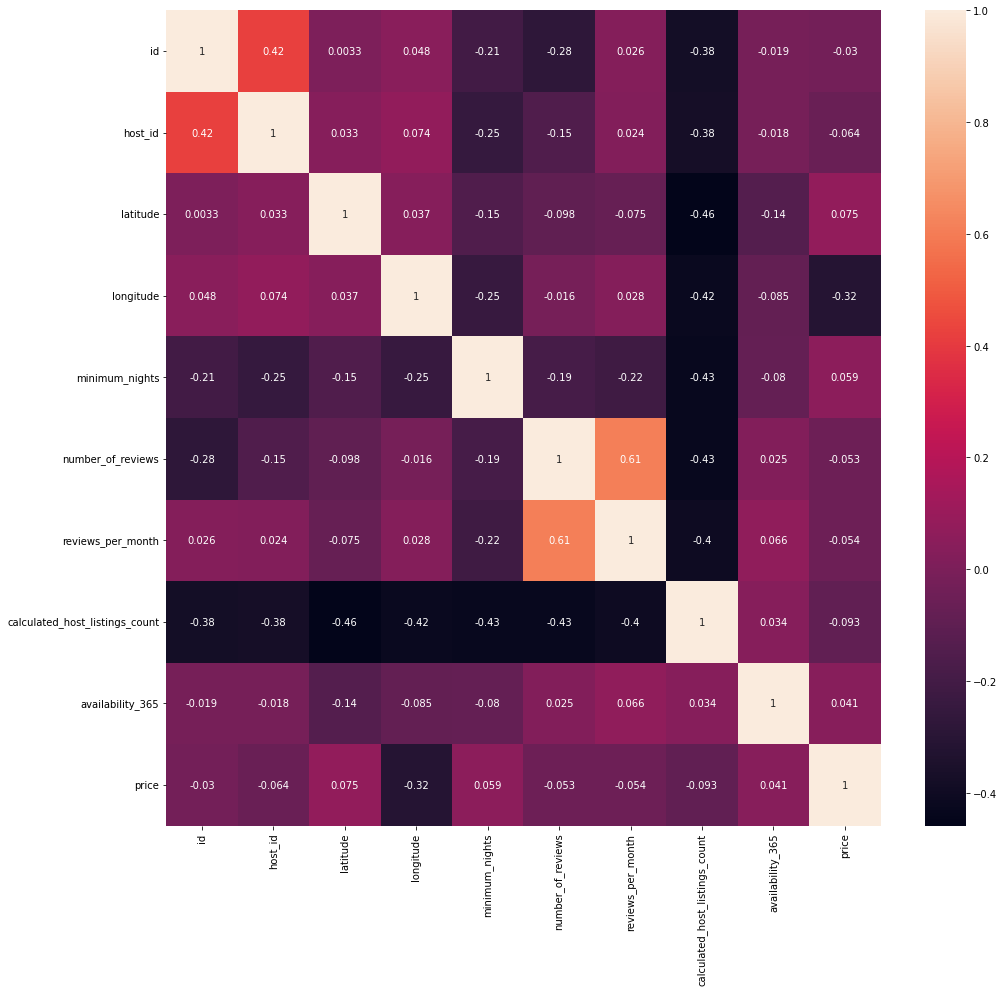

In [17]:
corr = data.corr(method='kendall')
figure(figsize=(16,15))
sns.heatmap(corr, annot=True)
data.columns

In [18]:
#data visual (analyze step)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

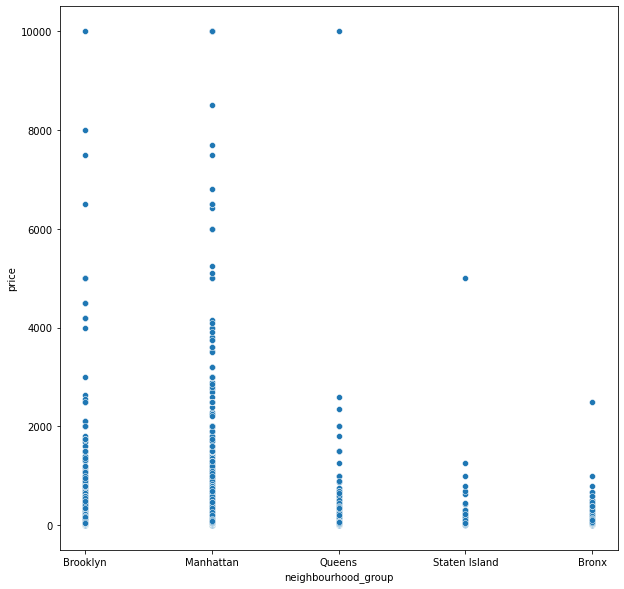

In [19]:
figure(figsize=(10,10))
sns.scatterplot(x='neighbourhood_group', y='price', data=data, palette='plasma')

c:\users\thana\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood Group')

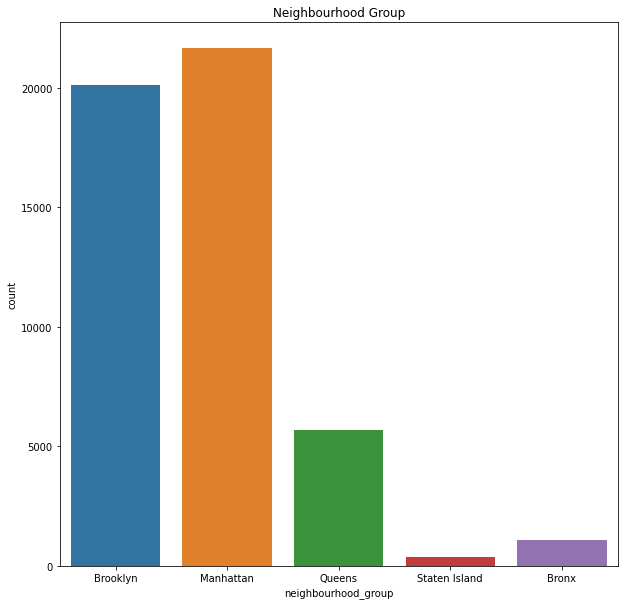

In [20]:
sns.countplot(data['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

c:\users\thana\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'room_type')

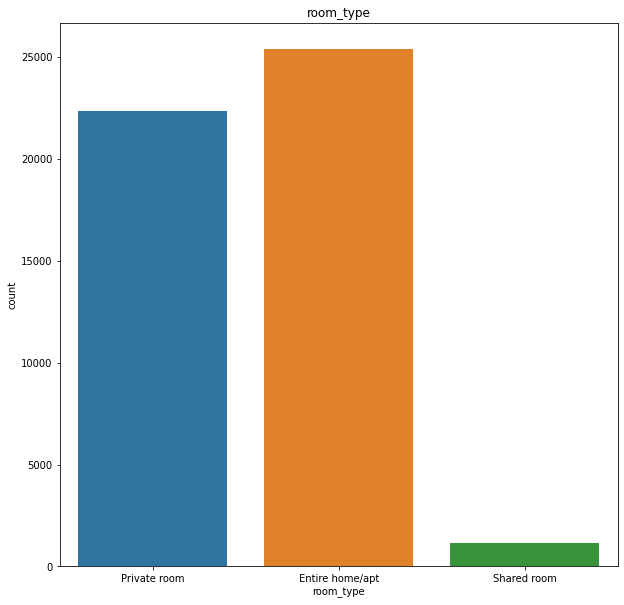

In [21]:
sns.countplot(data['room_type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('room_type')

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [23]:
dataset = data.copy()
dataset['ppd'] = dataset['price'] / dataset['minimum_nights']
dataset.drop(dataset[dataset.ppd > 500].index, inplace=True)
dataset.drop(dataset[dataset.price > 500].index, inplace=True)
airbnb = data.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)

In [24]:
dataset

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,ppd
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,6,365,149,149.000000
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2,355,225,225.000000
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,1,365,150,50.000000
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,1,194,89,89.000000
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,1,0,80,8.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,2,0,0.00,2,9,70,35.000000
48891,36485057,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,4,0,0.00,2,36,40,10.000000
48892,36485431,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,10,0,0.00,1,27,115,11.500000
48893,36485609,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,1,0,0.00,6,2,55,55.000000


In [25]:
dataset[dataset['ppd'] < 1000].count()

id                                47851
host_id                           47851
neighbourhood_group               47851
neighbourhood                     47851
latitude                          47851
longitude                         47851
room_type                         47851
minimum_nights                    47851
number_of_reviews                 47851
reviews_per_month                 47851
calculated_host_listings_count    47851
availability_365                  47851
price                             47851
ppd                               47851
dtype: int64

In [26]:
dataset[dataset['price'] < 1000].count()

id                                47851
host_id                           47851
neighbourhood_group               47851
neighbourhood                     47851
latitude                          47851
longitude                         47851
room_type                         47851
minimum_nights                    47851
number_of_reviews                 47851
reviews_per_month                 47851
calculated_host_listings_count    47851
availability_365                  47851
price                             47851
ppd                               47851
dtype: int64

In [27]:
data.drop(['id'], axis=1, inplace=True)

In [28]:
data.head()

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,Brooklyn,Private room,1,6,365,149
1,Manhattan,Entire home/apt,1,2,355,225
2,Manhattan,Private room,3,1,365,150
3,Brooklyn,Entire home/apt,1,1,194,89
4,Manhattan,Entire home/apt,10,1,0,80


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['neighbourhood_group'] = le.fit_transform(data['neighbourhood_group'])
data['room_type'] = le.fit_transform(data['room_type'])

In [30]:
data.head()

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,1,1,1,6,365,149
1,2,0,1,2,355,225
2,2,1,3,1,365,150
3,1,0,1,1,194,89
4,2,0,10,1,0,80


In [31]:
#data['price'] = data['price'] / data['minimum_nights']

In [32]:
#data['price'] = data['price'] * data['minimum_nights']
data.head()

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365,price
0,1,1,1,6,365,149
1,2,0,1,2,355,225
2,2,1,3,1,365,150
3,1,0,1,1,194,89
4,2,0,10,1,0,80


In [33]:
x = data.iloc[:, [0, 1, 2, 3, 4]]
y = data.iloc[:, [5]]

In [34]:
x

,neighbourhood_group,room_type,minimum_nights,calculated_host_listings_count,availability_365
0,1,1,1,6,365
1,2,0,1,2,355
2,2,1,3,1,365
3,1,0,1,1,194
4,2,0,10,1,0
...,...,...,...,...,...
48890,1,1,2,2,9
48891,1,1,4,2,36
48892,2,0,10,1,27
48893,2,2,1,6,2


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=5, test_size = 0.2)

x_train.shape

(39116, 5)

In [36]:
y_train.shape

(39116, 1)

In [37]:
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.0342587760902342

In [38]:
from sklearn.ensemble import RandomForestClassifier

RDTree = RandomForestClassifier()
RDTree.fit(x_train, y_train.values.ravel())
y_pred = RDTree.predict(x_test)
r2_score(y_test,y_predict)

0.0342587760902342

In [39]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.05929413054896282

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood_group             48895 non-null  int32
 1   room_type                       48895 non-null  int32
 2   minimum_nights                  48895 non-null  int64
 3   calculated_host_listings_count  48895 non-null  int64
 4   availability_365                48895 non-null  int64
 5   price                           48895 non-null  int64
dtypes: int32(2), int64(4)
memory usage: 1.9 MB


In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47851 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47851 non-null  int64  
 1   host_id                         47851 non-null  int64  
 2   neighbourhood_group             47851 non-null  object 
 3   neighbourhood                   47851 non-null  object 
 4   latitude                        47851 non-null  float64
 5   longitude                       47851 non-null  float64
 6   room_type                       47851 non-null  object 
 7   minimum_nights                  47851 non-null  int64  
 8   number_of_reviews               47851 non-null  int64  
 9   reviews_per_month               47851 non-null  float64
 10  calculated_host_listings_count  47851 non-null  int64  
 11  availability_365                47851 non-null  int64  
 12  price                           

In [42]:
dataset[dataset['ppd'] < 1000].count()

id                                47851
host_id                           47851
neighbourhood_group               47851
neighbourhood                     47851
latitude                          47851
longitude                         47851
room_type                         47851
minimum_nights                    47851
number_of_reviews                 47851
reviews_per_month                 47851
calculated_host_listings_count    47851
availability_365                  47851
price                             47851
ppd                               47851
dtype: int64

In [43]:
BBox = ((dataset.longitude.min(),   dataset.longitude.max(),      
         dataset.latitude.min(), dataset.latitude.max()))
print(BBox)
#BBox = ((dataset['longitude'].loc[dataset['longitude'].idxmin()] ,  dataset['longitude'].loc[dataset['longitude'].idxmax()] ,      
         #dataset['latitude'].loc[dataset['latitude'].idxmin()], dataset['latitude'].loc[dataset['latitude'].idxmax()] ))

(-74.24442, -73.71299, 40.49979, 40.91306)


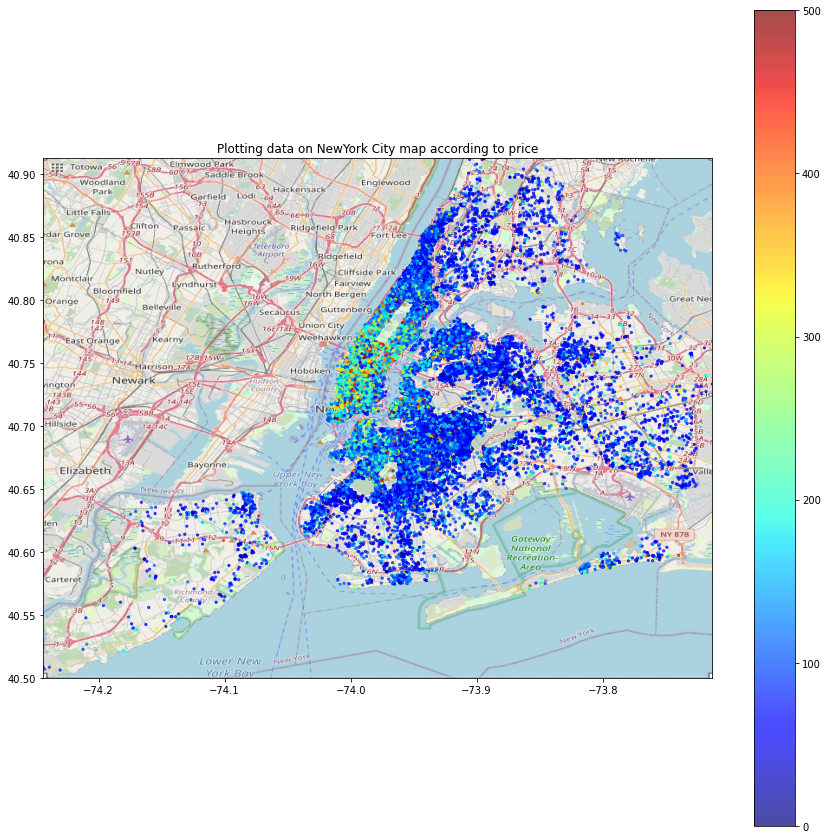

In [46]:
image = plt.imread('asd1.jpg')
fig, ax = plt.subplots(figsize = (15,15))
ac = ax.scatter(dataset['longitude'], dataset['latitude'], zorder=1, alpha= 0.7, c=dataset.price, s=5, cmap=plt.get_cmap('jet'), 
          )
ax.set_title('Plotting data on NewYork City map according to price')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.colorbar(ac)
ax.imshow(image, zorder=0, extent = BBox, aspect= 'equal')


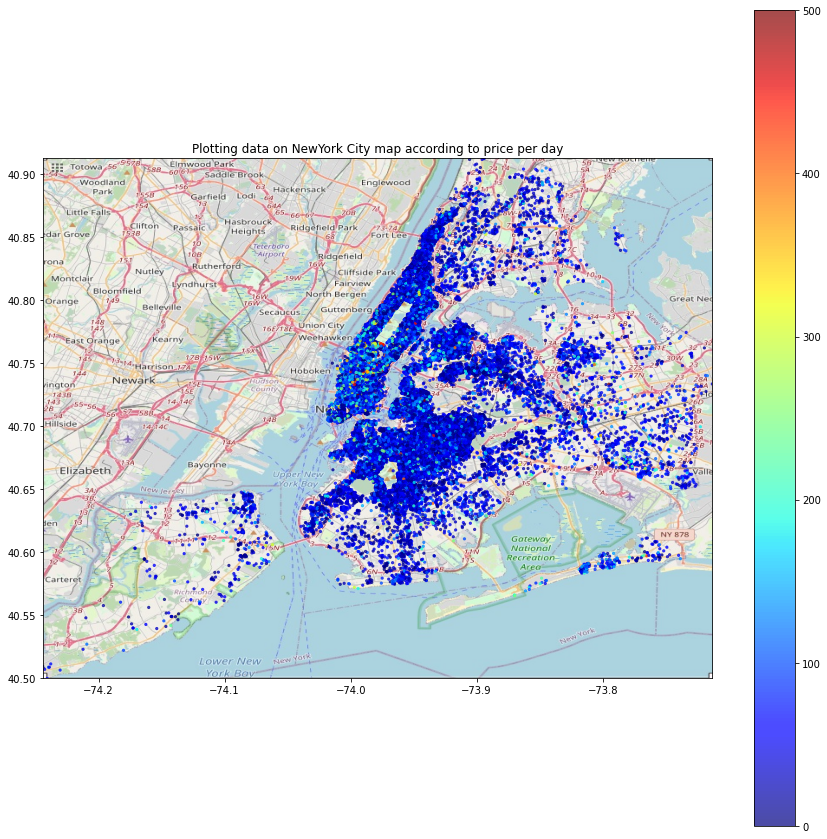

In [47]:
image = plt.imread('asd1.jpg')
fig, ax = plt.subplots(figsize = (15,15))
ac = ax.scatter(dataset['longitude'], dataset['latitude'], zorder=1, alpha= 0.7, c=dataset.ppd, s=5, cmap=plt.get_cmap('jet'), 
          )
ax.set_title('Plotting data on NewYork City map according to price per day')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
plt.colorbar(ac)
ax.imshow(image, zorder=0, extent = BBox, aspect= 'equal')


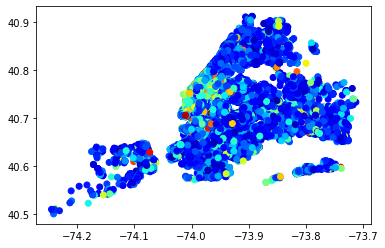

In [45]:
plt.scatter(dataset['longitude'], dataset['latitude'], c=dataset['price'], cmap=plt.get_cmap('jet'))